In [30]:
import pandas as pd

import json

In [33]:
df = pd.read_json('../assets/reviews.json', orient='records')

df

,reviewid,title,artist_x,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,genre,year,label,artist_y,content
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,electronic,1998,virgin,massive attack,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,metal,2016,hathenter,krallice,"Eight years, five albums, and two EPs in, the ..."
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,rock,2016,"static shock,fashionable idiots",uranium club,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,rock,2016,"kill rock stars,mississippi","kleenex,liliput",Kleenex began with a crash. It transpired one ...
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,electronic,2016,teklife,taso,It is impossible to consider a given release b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18412,1535,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,None,1999-01-26,1,26,1,1999,"jazz,electronic",None,ninja tune,coldcut,The marketing guys of yer average modern megac...
18413,1341,1999,cassius,http://pitchfork.com/reviews/albums/1341-1999/,4.8,0,james p. wisdom,None,1999-01-26,1,26,1,1999,electronic,None,astralwerks,cassius,"Well, it's been two weeks now, and I guess it'..."
18414,5376,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12,1,1999,rock,None,4ad,mojave 3,"Out of Tune is a Steve Martin album. Yes, I'l..."
18415,2413,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,None,1999-01-12,1,12,1,1999,"rock,metal,experimental",1999,touch and go,don caballero,"Well, kids, I just went back and re-read my re..."


In [3]:
df.drop(['artist_y', 'best_new_music', 'author_type', 'pub_weekday', 'pub_day', 'pub_month', 'pub_year', 'url'], inplace=True, axis=1)

df.head()

,reviewid,title,artist_x,score,author,pub_date,genre,year,label,content
0,22703,mezzanine,massive attack,9.3,nate patrin,2017-01-08,electronic,1998,virgin,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,prelapsarian,krallice,7.9,zoe camp,2017-01-07,metal,2016,hathenter,"Eight years, five albums, and two EPs in, the ..."
2,22659,all of them naturals,uranium club,7.3,david glickman,2017-01-07,rock,2016,static shock|fashionable idiots,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,first songs,"kleenex, liliput",9.0,jenn pelly,2017-01-06,rock,2016,kill rock stars|mississippi,Kleenex began with a crash. It transpired one ...
4,22725,new start,taso,8.1,kevin lozano,2017-01-06,electronic,2016,teklife,It is impossible to consider a given release b...


In [4]:
df = df.rename(columns={"pub_date": "review_publication_date", "year": "song_release_year", "label": "record_label", "content":"review_content", "artist_x": "artist"})
df.head()

,reviewid,title,artist,score,author,review_publication_date,genre,song_release_year,record_label,review_content
0,22703,mezzanine,massive attack,9.3,nate patrin,2017-01-08,electronic,1998,virgin,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,prelapsarian,krallice,7.9,zoe camp,2017-01-07,metal,2016,hathenter,"Eight years, five albums, and two EPs in, the ..."
2,22659,all of them naturals,uranium club,7.3,david glickman,2017-01-07,rock,2016,static shock|fashionable idiots,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,first songs,"kleenex, liliput",9.0,jenn pelly,2017-01-06,rock,2016,kill rock stars|mississippi,Kleenex began with a crash. It transpired one ...
4,22725,new start,taso,8.1,kevin lozano,2017-01-06,electronic,2016,teklife,It is impossible to consider a given release b...


In [5]:
df['review_publication_date']

0        2017-01-08
1        2017-01-07
2        2017-01-07
3        2017-01-06
4        2017-01-06
            ...    
18412    1999-01-26
18413    1999-01-26
18414    1999-01-12
18415    1999-01-12
18416    1999-01-05
Name: review_publication_date, Length: 18417, dtype: object

In [6]:
df['review_publication_date'] = pd.to_datetime(df['review_publication_date'], format='%Y-%m-%d')
df['review_publication_date']

0       2017-01-08
1       2017-01-07
2       2017-01-07
3       2017-01-06
4       2017-01-06
           ...    
18412   1999-01-26
18413   1999-01-26
18414   1999-01-12
18415   1999-01-12
18416   1999-01-05
Name: review_publication_date, Length: 18417, dtype: datetime64[ns]

In [7]:
df.loc[df['review_content'] != ''] 

,reviewid,title,artist,score,author,review_publication_date,genre,song_release_year,record_label,review_content
0,22703,mezzanine,massive attack,9.3,nate patrin,2017-01-08,electronic,1998,virgin,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,prelapsarian,krallice,7.9,zoe camp,2017-01-07,metal,2016,hathenter,"Eight years, five albums, and two EPs in, the ..."
2,22659,all of them naturals,uranium club,7.3,david glickman,2017-01-07,rock,2016,static shock|fashionable idiots,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,first songs,"kleenex, liliput",9.0,jenn pelly,2017-01-06,rock,2016,kill rock stars|mississippi,Kleenex began with a crash. It transpired one ...
4,22725,new start,taso,8.1,kevin lozano,2017-01-06,electronic,2016,teklife,It is impossible to consider a given release b...
...,...,...,...,...,...,...,...,...,...,...
18412,1535,let us replay!,coldcut,8.9,james p. wisdom,1999-01-26,jazz|electronic,None,ninja tune,The marketing guys of yer average modern megac...
18413,1341,1999,cassius,4.8,james p. wisdom,1999-01-26,electronic,None,astralwerks,"Well, it's been two weeks now, and I guess it'..."
18414,5376,out of tune,mojave 3,6.3,jason josephes,1999-01-12,rock,None,4ad,"Out of Tune is a Steve Martin album. Yes, I'l..."
18415,2413,"singles breaking up, vol. 1",don caballero,7.2,james p. wisdom,1999-01-12,rock|metal|experimental,1999,touch and go,"Well, kids, I just went back and re-read my re..."


In [12]:
data = df.to_json('../assets/clean_reviews.json', orient='records')

'“Trip-hop” eventuall'

['Trip',
 'hop',
 'eventually',
 'became',
 'a',
 '90s',
 'punchline',
 'a',
 'music',
 'press']

['trip', 'hop', 'eventually', 'became', 'a', '90s', 'punchline', 'a']

['i', 'me', 'my', 'myself', 'we']

['trip', 'hop', 'eventually', 'became', '90s']

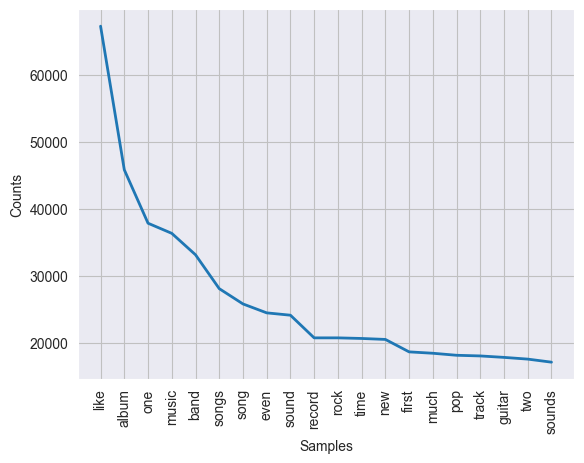